In [69]:
import tsa_utils
import deep_cnn
import mini_cnn

from shutil import copytree
import numpy as np
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import matplotlib.animation
import tensorflow as tf
from numpy import genfromtxt
import pandas as pd
import sys
sys.path.append(os.getcwd())

import numpy as np
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import matplotlib.animation
import tensorflow as tf
from numpy import genfromtxt
import pandas as pd
import sys
import math 
import sklearn
from sklearn import metrics

sys.path.append(os.getcwd())
import mini_cnn
import pip
pip.main(['install', '--upgrade', 'dask'])
import sklearn.decomposition
from sklearn.preprocessing import StandardScaler
import pickle

Requirement already up-to-date: dask in /home/cody/anaconda3/envs/p2.7/lib/python2.7/site-packages


/home/cody/anaconda3/envs/p2.7/lib/python2.7/site-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


In [63]:
DATA_PATH="./images/"
CHECKPOINT_PATH="/output/multi-class8"
MODEL_ID="multi_class"


In [29]:
def tile_image(infile):
    x_step = 512 /8 
    y_step = 660/ 6
    data = []
    for i in range(0,8):
        for j in range(0,6):
            data.append(tsa_utils.read_data_coords(infile, x_step*i, y_step*j, x_step, y_step))
    return np.array(data)

In [100]:
image_df = pd.read_csv(DATA_PATH + 'stage1_labels.csv')
image_df['zone'] = image_df['Id'].str.split("_", expand=True)[1].str.strip()
image_df['id'] = image_df['Id'].str.split("_", expand=True)[0].str.strip()
image_df=image_df.groupby("id").sum().reset_index()
image_df = image_df[image_df["Probability"]== 0]
safe_labels = image_df["id"].unique()

In [71]:
# for label in labels:
#     tiled_image = tile_image(DATA_PATH + label + ".aps")
#     tiled_file = open(DATA_PATH + "pickled_images/" + label ,"wb+")
#     tiled_image.dump(tiled_file)

In [80]:
# image_df = pd.read_csv(DATA_PATH + 'stage1_labels.csv')
# image_df['zone'] = image_df['Id'].str.split("_", expand=True)[1].str.strip()
# image_df['id'] = image_df['Id'].str.split("_", expand=True)[0].str.strip()
# image_df = image_df[(image_df["Probability"]!= 1) & (image_df["zone"]== "Zone14")]

# labels = image_df["id"].unique()
# matrix = []
# for label in labels[:10]:
#     try:
#         matrix.append(np.load(DATA_PATH + "/pickled_images/" + str(label)))
#     except Exception as e:
#         print(e)
# safe_matrix = np.vstack(matrix)

In [90]:
image_df = pd.read_csv(DATA_PATH + 'stage1_labels.csv')
image_df['zone'] = image_df['Id'].str.split("_", expand=True)[1].str.strip()
image_df['id'] = image_df['Id'].str.split("_", expand=True)[0].str.strip()
image_df = image_df[(image_df["Probability"]!= 1) & (image_df["zone"]== "Zone14")]
safe_pca = sklearn.decomposition.IncrementalPCA(n_components=30,whiten=True)

matrix = []
for label in safe_labels:
    try:
        data = np.load(DATA_PATH + "/pickled_images/" + str(label))
        safe_pca.partial_fit(data.reshape((48*16*110),64))
    except Exception as e:
        print(e)


0050492f92e22eed3474ae3a6fc907fa
006ec59fa59dd80a64c85347eef810c7
0097503ee9fa0606559c56458b281a08
011516ab0eca7cad7f5257672ddde70e
01941f33fd090ae5df8c95992c027862
0240c8f1e89e855dcd8f1fa6b1e2b944
0322661ef29f9c81af295cf40f758469
037024e4a7122e10546ebc41859c6833
038d648c2f29cb0f945c865be25e32e9
0397026df63bbc8fd88f9860c6e35b4a
03a36512c2c6d71c33b3429b8b59494e
04b32b70b4ab15cad85d43e3b5359239
052117021fc1396db6bae78ffe923ee4
0535d52b89f5dcca44563b62592ca366
05709d5e54f8fdc77fe233cf7df78b81
05aea64cd02c88b94d0663be46f4d2bf
06323e0c225d04e325d70d6adc0240ef
06726105fabadca043737601d06415a8
068be31bfd5fcc08699a50f08f255d9b
06f07ef12a24cd5ab6aa457ac8afa2a0
06ff02c1f431d0c21b945b4ea459cc88
0748878870d90c426ee75d30aed5b024
077c5701d8ee08e469ada0ef3b105cba
07a2f948ec404e8b729541d3c2702a69
07d04f2ba71419b0d7228f2c50c14318
08daf3a6cdb4f5e1ad15cb2431ea419a
090cdcef818e13089bf1898bb3fab820
091cfe2e108e277d82497ee1307f424c
0958be20b77ecd4b4e19d749a271b7bb
097dd567939b9ec200cbc29749fec135
098f5cfcf6

4275a47cbd350f67c9691d7b52313ac1
43104359ffec7bd07385479d840ef5b5
435cc314ea7e77733c95bcf05d252259
4374545e0e29d0c17cacb7d4453498b0
43a60ca08049962b96f62ea5658e0d63
43cf968c576544285cf11fb7f6c7b676
43d1a815858d7584eb6e0e84f8a1bf8b
44ac0d2d076928590d80acfda3871de8
44d0e116c3fd7fc8b023876e8ad60ea6
45073233709552ca8bc433e39b469b69
452d00e6fb36895567f246b9df3bd947
453a48a20387cc1a0e19b6147a48ff69
458911b2744acfb7fd1d201cc324e624
45ac0b88f67663a1d30dcfc8366fac31
45cd53f9ee0ba8fef7b16b5aa061f960
467cfa7996fcdb7e4f5c4d64c2a01de2
46b504b2e0160fa8332cffe1e8bfcaf7
470973ce5b21e1b7201b7ed56989aef2
4710b3962e50f2b546b2bd67f2c142fb
471829836c7df1fa0c63721d09ea6db9
47da5b8b67428fbdcfacdac9f77a8dfc
47e2a4a8e13ec7100f6af8cd839d1bb3
4826cf5a1a8b1958ef4a9b00c941be58
48309fc9d12a28f0ba94b8c6d81bc3c0
4847f9b1ba37f9970d647f419b43f768
4869f57f719b26a01dc7d196abe4f73d
4881eeb549b78b3fe90f9cdde9a5f649
48f1d872def62e5d5150c1a7d64d1196
490965e452b56fdfa3d406939b07c690
4967db4034491b1f8f06e726781c7d1c
496ec724cc

KeyboardInterrupt: 

In [162]:
image_df = pd.read_csv(DATA_PATH + 'stage1_labels.csv')
image_df['zone'] = image_df['Id'].str.split("_", expand=True)[1].str.strip()
image_df['id'] = image_df['Id'].str.split("_", expand=True)[0].str.strip()
image_df = image_df[(image_df["Probability"]== 1) & (image_df["zone"]== "Zone14")]

labels = image_df["id"].unique()
matrix = []
for label in labels:
    matrix.append(tsa_utils.read_data_coords(DATA_PATH + label + ".aps", "bottom","left")[0].flatten())
unsafe_matrix = np.vstack(matrix)
unsafe_matrix.shape
unsafe_matrix = unsafe_matrix

In [172]:
safe_pca = sklearn.decomposition.IncrementalPCA(n_components=30,whiten=True)
transformed = safe_pca.fit_transform(safe_matrix)
safe_reverse_transformed = safe_pca.inverse_transform(transformed)

In [173]:
transformed = safe_pca.transform(unsafe_matrix)
unsafe_reverse_transformed = safe_pca.inverse_transform(transformed)

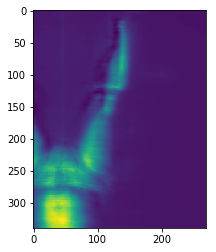

In [174]:
plt.imshow(unsafe_reverse_transformed[1].reshape(340,-1))
plt.show()

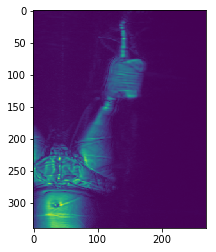

In [182]:
plt.imshow(unsafe_matrix[1].reshape(340,-1))
plt.show()

In [176]:
safe_diff

NameError: name 'safe_diff' is not defined

In [177]:
safe_diff = safe_matrix - safe_reverse_transformed

In [178]:
unsafe_diff = unsafe_matrix - unsafe_reverse_transformed

In [179]:
unsafe_diff.shape

(122, 91800)

In [180]:
np.sum(np.absolute(safe_diff)) / 1025

1.4484910918445122

In [181]:
np.sum(np.absolute(unsafe_diff)) / 122

1.5403394855436732

In [384]:
unsafe_pca = sklearn.decomposition.PCA(n_components=10, svd_solver='arpack')
unsafe_pca.fit(unsafe_matrix)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='arpack', tol=0.0, whiten=False)

In [16]:
unsafe_pca.get_precision()

/usr/local/lib/python3.5/site-packages/sklearn/decomposition/base.py:75: RuntimeWarning: divide by zero encountered in true_divide
  precision.flat[::len(precision) + 1] += 1. / exp_var_diff


ValueError: array must not contain infs or NaNs

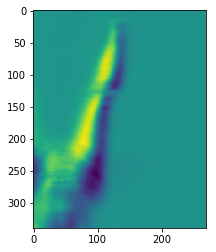

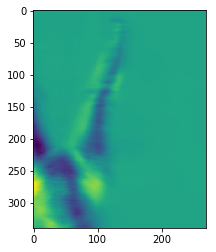

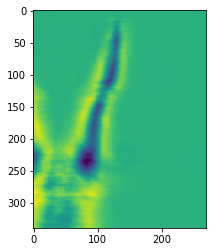

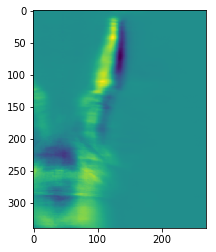

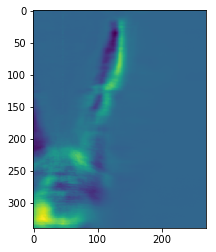

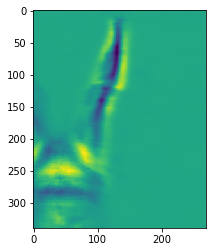

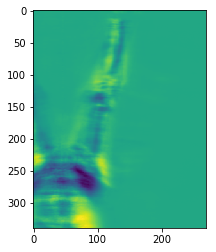

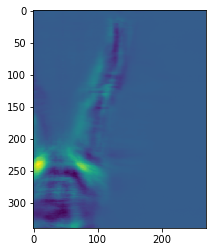

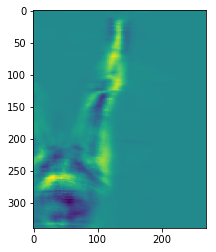

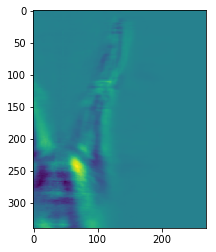

In [130]:
for component in safe_pca.components_:
    component = component.reshape(340, -1)
    plt.imshow(component)
    plt.show()

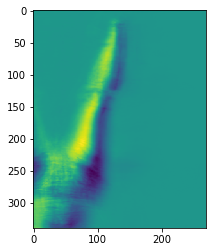

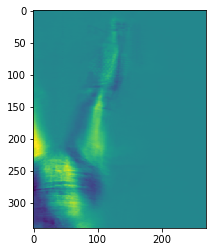

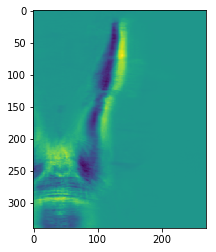

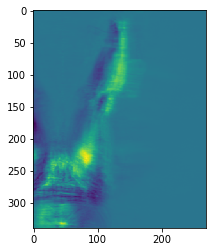

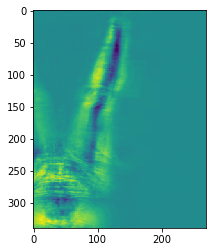

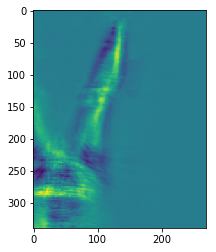

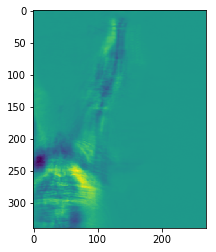

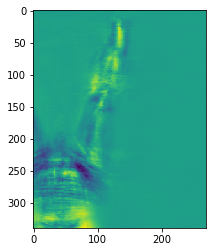

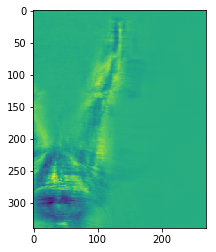

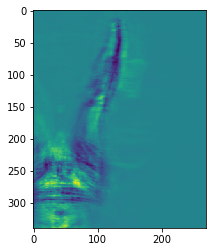

In [132]:
for component in unsafe_pca.components_:
    component = component.reshape(340, -1)
    plt.imshow(component)
    plt.show()

In [148]:
safe_pca.transform([safe_matrix[1]])

array([[-0.01058194,  0.00131115, -0.00613938,  0.00084266, -0.00385157,
        -0.00407108,  0.00090093,  0.0053534 ,  0.00079666, -0.00212731]], dtype=float32)

In [147]:
safe_pca.transform([unsafe_matrix[1]])

array([[-0.00491124,  0.00069131,  0.00052026, -0.00596701,  0.00676027,
         0.00818136, -0.00077467, -0.00167559, -0.00109783,  0.0006853 ]], dtype=float32)

In [153]:
np.all(np.isfinite(unsafe_matrix))

True

In [155]:
safe_pca.score_samples([unsafe_matrix[1]])

MemoryError: 

In [150]:
safe_pca.get_precision()

MemoryError: 

In [118]:
unsafe_matrix[0]

array([  1.59924257e-05,   1.48289819e-05,   1.48684203e-05, ...,
         7.49336823e-06,   8.16382726e-06,   8.02579234e-06], dtype=float32)

In [119]:
safe_matrix[0]

array([  1.59924257e-05,   1.48289819e-05,   1.48684203e-05, ...,
         7.49336823e-06,   8.16382726e-06,   8.02579234e-06], dtype=float32)